# 순환 신경망(Recurrent Neural Network, RNN)

- 루프(loop)를 가진 신경망의 한 종류

- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장

<img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png">

<sub>출처: https://towardsdatascience.com/understanding-rnn-and-lstm-f7cdf6dfc14e</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [13]:
import numpy as np

In [14]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

sucessive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    sucessive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(sucessive_outputs, axis = 0)

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [15]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [17]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [18]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## IMDB 데이터 적용

### 데이터 로드

In [19]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [20]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_words)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen = max_len)
input_test  = sequence.pad_sequences(input_test, maxlen = max_len)
print(input_train.shape)
print(input_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [21]:
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [23]:
hist = model.fit(input_train, y_train,
                 epochs = 10,
                 batch_size = 128,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 83s 526ms/step - loss: 0.5829 - acc: 0.6992 - val_loss: 0.4247 - val_acc: 0.8274
Epoch 2/10
157/157 [==============================] - 82s 523ms/step - loss: 0.3625 - acc: 0.8485 - val_loss: 0.3574 - val_acc: 0.8458
Epoch 3/10
157/157 [==============================] - 82s 522ms/step - loss: 0.2838 - acc: 0.8881 - val_loss: 0.4105 - val_acc: 0.8360
Epoch 4/10
157/157 [==============================] - 81s 515ms/step - loss: 0.2382 - acc: 0.9054 - val_loss: 0.4287 - val_acc: 0.8216
Epoch 5/10
157/157 [==============================] - 81s 515ms/step - loss: 0.2012 - acc: 0.9231 - val_loss: 0.3719 - val_acc: 0.8448
Epoch 6/10
157/157 [==============================] - 81s 516ms/step - loss: 0.1595 - acc: 0.9398 - val_loss: 0.4300 - val_acc: 0.8236
Epoch 7/10
157/157 [==============================] - 81s 519ms/step - loss: 0.1164 - acc: 0.9604 - val_loss: 0.4459 - val_acc: 0.8302
Epoch 8/10
157/157 [==============================] - 8

### 시각화

In [24]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

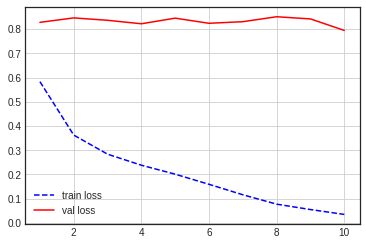

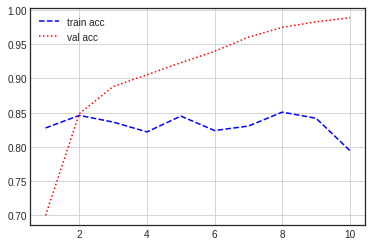

In [25]:
loss = hist.history['loss']
val_loss = hist.history['val_acc']
acc = hist.history['val_acc']
val_acc = hist.history['acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'train loss')
plt.plot(epochs, val_loss, 'r-' , label = 'val loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'train acc')
plt.plot(epochs, val_acc, 'r:' , label = 'val acc')
plt.grid()
plt.legend()

In [26]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 31s 40ms/step - loss: 1.0321 - acc: 0.7577


[1.0320619344711304, 0.7577199935913086]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

# LSTM과 GRU 레이어

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



## LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 예제로 보는 순환 신경망: Reuters 

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [27]:
from tensorflow.keras.datasets import reuters

In [28]:
num_words = 1000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = num_words)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

2113536/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
max_len = 500

In [31]:
pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test  = pad_sequences(x_test , maxlen = max_len)

print(len(pad_x_train[0]))

500


In [32]:
pad_x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [34]:
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(64, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
Total params: 111,552
Trainable params: 111,552
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [35]:
hist = model.fit(pad_x_train, y_train,
                 batch_size = 32,
                 epochs = 20,
                 validation_split = 0.2)

Epoch 1/20
225/225 [==============================] - 43s 191ms/step - loss: 2.6136 - acc: 0.3537 - val_loss: 2.4186 - val_acc: 0.3450
Epoch 2/20
225/225 [==============================] - 42s 188ms/step - loss: 2.4152 - acc: 0.3534 - val_loss: 2.4140 - val_acc: 0.3450
Epoch 3/20
225/225 [==============================] - 42s 189ms/step - loss: 2.4118 - acc: 0.3534 - val_loss: 2.4067 - val_acc: 0.3450
Epoch 4/20
225/225 [==============================] - 43s 189ms/step - loss: 2.4085 - acc: 0.3534 - val_loss: 2.4100 - val_acc: 0.3450
Epoch 5/20
225/225 [==============================] - 42s 188ms/step - loss: 2.3146 - acc: 0.4134 - val_loss: 2.4111 - val_acc: 0.3456
Epoch 6/20
225/225 [==============================] - 42s 188ms/step - loss: 2.2276 - acc: 0.4380 - val_loss: 2.0535 - val_acc: 0.4903
Epoch 7/20
225/225 [==============================] - 42s 188ms/step - loss: 1.9826 - acc: 0.5150 - val_loss: 1.9585 - val_acc: 0.5125
Epoch 8/20
225/225 [==============================] - 4

### 시각화

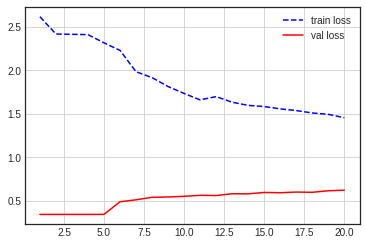

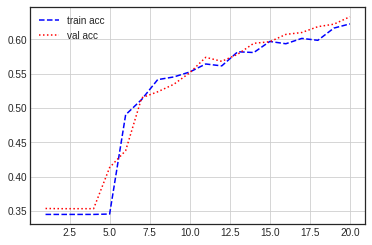

In [36]:
loss = hist.history['loss']
val_loss = hist.history['val_acc']
acc = hist.history['val_acc']
val_acc = hist.history['acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'train loss')
plt.plot(epochs, val_loss, 'r-' , label = 'val loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'train acc')
plt.plot(epochs, val_acc, 'r:' , label = 'val acc')
plt.grid()
plt.legend()

### 모델 평가


In [37]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 5s 66ms/step - loss: 1.5728 - acc: 0.6033


[1.5728132724761963, 0.6032947301864624]

## IMDB 데이터셋 with LSTM

### 데이터 로드

In [46]:
from tensorflow.keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

In [47]:
num_words = 10000
max_len = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)
print(len(x_train))
print(len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen = max_len)
pad_x_test  = sequence.pad_sequences(x_test, maxlen = max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [48]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'acc')

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [49]:
hist = model.fit(pad_x_train, y_train,
                 epochs = 10,
                 batch_size = 128,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 14s 91ms/step - loss: 0.5178 - acc: 0.7595 - val_loss: 0.4971 - val_acc: 0.7582
Epoch 2/10
157/157 [==============================] - 14s 88ms/step - loss: 0.2877 - acc: 0.8864 - val_loss: 0.4054 - val_acc: 0.8220
Epoch 3/10
157/157 [==============================] - 14s 88ms/step - loss: 0.2345 - acc: 0.9128 - val_loss: 0.2849 - val_acc: 0.8836
Epoch 4/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1997 - acc: 0.9273 - val_loss: 0.4806 - val_acc: 0.8514
Epoch 5/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1776 - acc: 0.9365 - val_loss: 0.3558 - val_acc: 0.8802
Epoch 6/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1619 - acc: 0.9437 - val_loss: 0.3791 - val_acc: 0.8502
Epoch 7/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1505 - acc: 0.9477 - val_loss: 0.4194 - val_acc: 0.8690
Epoch 8/10
157/157 [==============================] - 14s 88ms

### 시각화

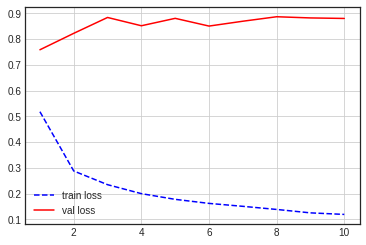

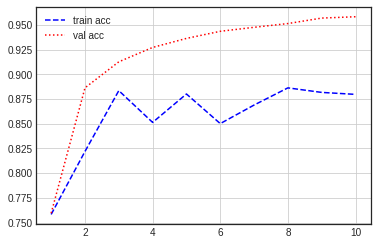

In [50]:
loss = hist.history['loss']
val_loss = hist.history['val_acc']
acc = hist.history['val_acc']
val_acc = hist.history['acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'train loss')
plt.plot(epochs, val_loss, 'r-' , label = 'val loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'train acc')
plt.plot(epochs, val_acc, 'r:' , label = 'val acc')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [51]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 23s 29ms/step - loss: 0.4369 - acc: 0.8634


[0.4368714988231659, 0.8633999824523926]

# Cosine 함수를 이용한 순환 신경망

In [53]:
import numpy as np

In [54]:
np.random.seed(111)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361))

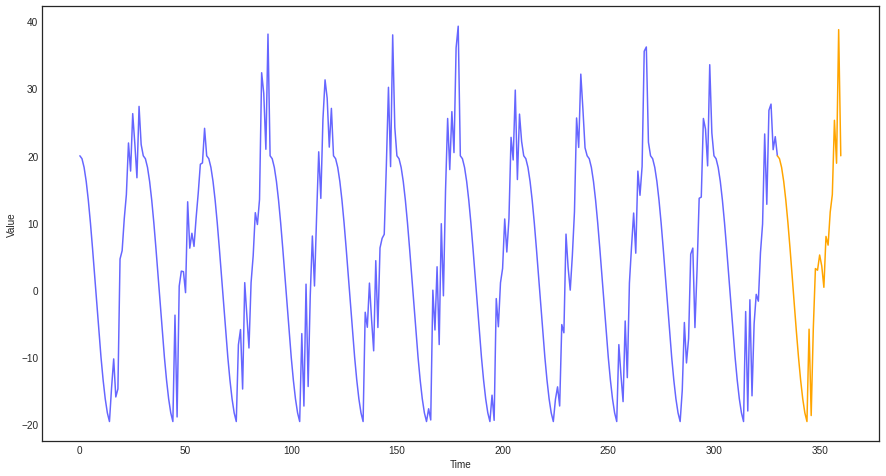

In [56]:
plt.figure(figsize = (15, 8))

plt.xlabel('Time')
plt.ylabel("Value")
plt.plot(np.arange(0, 30 * 11 + 1),
         time_series[:30*11 + 1],
         color = 'blue', alpha = 0.6, label = 'Train Data')
plt.plot(np.arange(30 * 11, 30 * 12 + 1),
         time_series[30 * 11:],
         color = 'orange', label = 'Test Data')
plt.show()

### 데이터 전처리

In [57]:
def make_data(time_series, n):
    x_train_full, y_train_full = list(), list()

    for i in range(len(time_series)):
        x = time_series[i : (i + n)]
        if (i + n) < len(time_series):
            x_train_full.append(x)
            y_train_full.append(time_series[i + n])
        else:
            break
            
    x_train_full, y_train_full = np.array(x_train_full), np.array(y_train_full)

    return x_train_full, y_train_full

In [58]:
n = 10
x_train_full, y_train_full = make_data(time_series, n)

In [59]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10)
(351,)


In [60]:
x_train_full = x_train_full.reshape(-1, n, 1)
y_train_full = y_train_full.reshape(-1, 1)

In [61]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10, 1)
(351, 1)


## 테스트 데이터셋 생성

In [62]:
x_train = x_train_full[:30 * 11]
y_train = y_train_full[:30 * 11]

x_test = x_train_full[30 * 11:]
y_test = y_train_full[30 * 11:]

In [63]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(330, 10, 1) (330, 1)
(21, 10, 1) (21, 1)


## 데이터 확인

In [64]:
sample_series = np.arange(100)
a, b = make_data(sample_series, 10)

print(a[0])
print(b[0])

[0 1 2 3 4 5 6 7 8 9]
10


## 모델 구성

In [65]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

In [66]:
def build_model(n):
    model = Sequential()

    model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1)))
    model.add(Dense(1))

    model.compile(optimizer = 'adam',
                  loss = 'mse')
    return model

In [67]:
model = build_model(10)
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, 32)                1088      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [68]:
model.fit(x_train, y_train,
          epochs = 100, batch_size = 12)

Epoch 1/100
28/28 [==============================] - 0s 13ms/step - loss: 184.9207
Epoch 2/100
28/28 [==============================] - 0s 12ms/step - loss: 156.3944
Epoch 3/100
28/28 [==============================] - 0s 13ms/step - loss: 137.7279
Epoch 4/100
28/28 [==============================] - 0s 12ms/step - loss: 124.3657
Epoch 5/100
28/28 [==============================] - 0s 12ms/step - loss: 112.7245
Epoch 6/100
28/28 [==============================] - 0s 11ms/step - loss: 102.9022
Epoch 7/100
28/28 [==============================] - 0s 12ms/step - loss: 94.9025
Epoch 8/100
28/28 [==============================] - 0s 13ms/step - loss: 88.0056
Epoch 9/100
28/28 [==============================] - 0s 12ms/step - loss: 81.9374
Epoch 10/100
28/28 [==============================] - 0s 12ms/step - loss: 76.5717
Epoch 11/100
28/28 [==============================] - 0s 13ms/step - loss: 71.7038
Epoch 12/100
28/28 [==============================] - 0s 13ms/step - loss: 67.3506
Epoch 1

## 예측값 그려보기

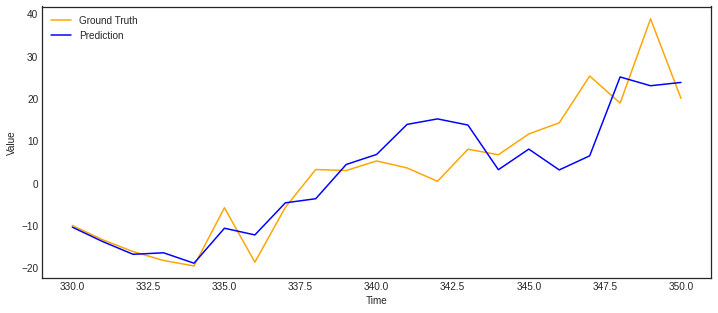

In [69]:
prediction = model.predict(x_test)
pred_range = np.arange(len(y_train), len(y_train) + len(prediction))

plt.figure(figsize = (12, 5))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
plt.plot(pred_range, prediction.flatten(), color = 'blue', label = 'Prediction')
plt.legend()
plt.show()

## 모델 재구성 (2)
- LSTM 사용

In [70]:
from tensorflow.keras.layers import LSTM

In [71]:
def build_model2(n):
    model = Sequential()

    model.add(LSTM(units = 64, return_sequences=True, activation = 'tanh', input_shape = (n, 1)))
    model.add(LSTM(32))
    model.add(Dense(1))

    model.compile(optimizer = 'adam',
                  loss = 'mse')
    return model

In [72]:
model_2 = build_model2(10)
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 64)            16896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그려보기

In [73]:
model_2.fit(x_train, y_train,
            epochs = 100,
            batch_size = 12)

Epoch 1/100
28/28 [==============================] - 0s 7ms/step - loss: 228.5165
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 182.3534
Epoch 3/100
28/28 [==============================] - 0s 7ms/step - loss: 139.3396
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 111.5518
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 92.9353
Epoch 6/100
28/28 [==============================] - 0s 7ms/step - loss: 80.0572
Epoch 7/100
28/28 [==============================] - 0s 7ms/step - loss: 69.4643
Epoch 8/100
28/28 [==============================] - 0s 7ms/step - loss: 62.6221
Epoch 9/100
28/28 [==============================] - 0s 7ms/step - loss: 55.7096
Epoch 10/100
28/28 [==============================] - 0s 7ms/step - loss: 51.7436
Epoch 11/100
28/28 [==============================] - 0s 7ms/step - loss: 47.6637
Epoch 12/100
28/28 [==============================] - 0s 7ms/step - loss: 44.5323
Epoch 13/100
28/28 [=

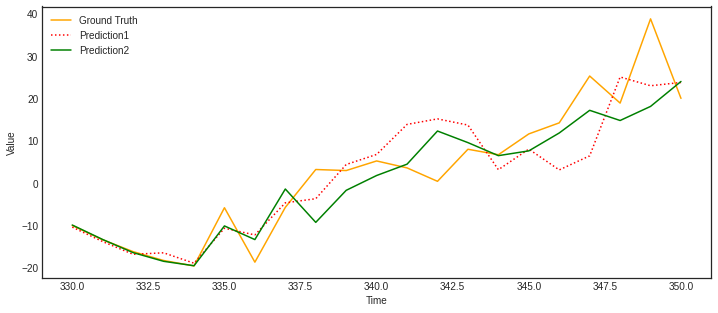

In [74]:
prediction_2 = model_2.predict(x_test)
pred_range = np.arange(len(y_train), len(y_train) + len(prediction_2))

plt.figure(figsize = (12, 5))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
plt.plot(pred_range, prediction.flatten(), 'r:', label = 'Prediction1')
plt.plot(pred_range, prediction_2.flatten(), color = 'green', label = 'Prediction2')

plt.legend()
plt.show()

## 모델 재구성(3)
- GRU 사용
  - LSTM 보다 더 쉬운 구조

In [75]:
from tensorflow.keras.layers import GRU

In [76]:
def build_model3(n):
    model = Sequential()

    model.add(GRU(units =30, return_sequences=True, input_shape = (n, 1)))
    model.add(GRU(30))
    model.add(Dense(1))

    model.compile(optimizer = 'adam',
                  loss = 'mse')
    
    return model

model_3 = build_model3(10)
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 30)            2970      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 8,581
Trainable params: 8,581
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그려보기

In [77]:
model_3.fit(x_train, y_train, 
            epochs = 100,
            batch_size = 12)

Epoch 1/100
28/28 [==============================] - 0s 7ms/step - loss: 197.7962
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 148.4702
Epoch 3/100
28/28 [==============================] - 0s 7ms/step - loss: 120.6203
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 100.1870
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 85.3479
Epoch 6/100
28/28 [==============================] - 0s 7ms/step - loss: 75.4249
Epoch 7/100
28/28 [==============================] - 0s 7ms/step - loss: 68.1816
Epoch 8/100
28/28 [==============================] - 0s 7ms/step - loss: 62.7366
Epoch 9/100
28/28 [==============================] - 0s 6ms/step - loss: 58.0704
Epoch 10/100
28/28 [==============================] - 0s 7ms/step - loss: 54.1165
Epoch 11/100
28/28 [==============================] - 0s 7ms/step - loss: 50.7399
Epoch 12/100
28/28 [==============================] - 0s 7ms/step - loss: 47.2107
Epoch 13/100
28/28 [=

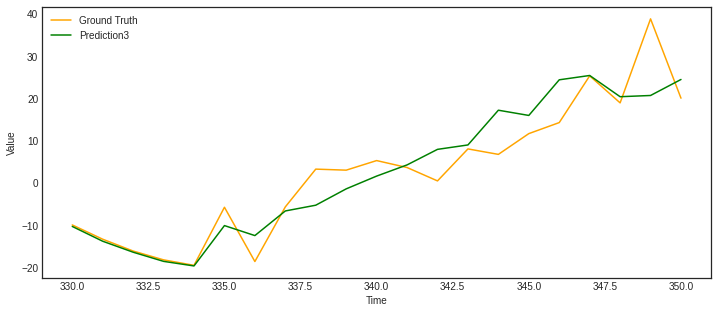

In [78]:
prediction_3 = model_3.predict(x_test)
pred_range = np.arange(len(y_train), len(y_train) + len(prediction_3))

plt.figure(figsize = (12, 5))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
#plt.plot(pred_range, prediction.flatten(), 'r:', label = 'Prediction1')
plt.plot(pred_range, prediction_3.flatten(), color = 'green', label = 'Prediction3')

plt.legend()
plt.show()

# Conv1D 

- 텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능

- 타임스텝의 순서에 민감하지 X


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

## Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

## MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

## GlovalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터셋

### 데이터 로드 및 전처리

In [79]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D


In [80]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_words)

print(len(input_train))
print(len(input_test))

25000
25000


In [82]:
pad_x_train = pad_sequences(input_train, maxlen = max_len)
pad_x_test = pad_sequences(input_test, maxlen = max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

(25000, 500)
(25000, 500)


### 모델 구성

In [85]:
def build_model():
    model =  Sequential()

    model.add(Embedding(input_dim = num_words, output_dim = 32,
                        input_length = max_len))
    model.add(Conv1D(32, 7, activation = 'relu'))
    model.add(MaxPooling1D(7))
    model.add(Conv1D(32, 5, activation = 'relu'))
    model.add(MaxPooling1D(5))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer = RMSprop(learning_rate = 1e-4),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    return model



In [86]:
model = build_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 70, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)               

### 모델 학습

In [87]:
hist = model.fit(pad_x_train, y_train,
                 epochs = 30,
                 batch_size = 128,
                 validation_split = 0.2)

Epoch 1/30
157/157 [==============================] - 4s 23ms/step - loss: 0.6930 - accuracy: 0.5084 - val_loss: 0.6926 - val_accuracy: 0.5142
Epoch 2/30
157/157 [==============================] - 3s 22ms/step - loss: 0.6906 - accuracy: 0.5870 - val_loss: 0.6914 - val_accuracy: 0.5302
Epoch 3/30
157/157 [==============================] - 4s 23ms/step - loss: 0.6876 - accuracy: 0.6444 - val_loss: 0.6884 - val_accuracy: 0.6470
Epoch 4/30
157/157 [==============================] - 4s 23ms/step - loss: 0.6817 - accuracy: 0.7225 - val_loss: 0.6810 - val_accuracy: 0.6410
Epoch 5/30
157/157 [==============================] - 3s 21ms/step - loss: 0.6678 - accuracy: 0.7512 - val_loss: 0.6590 - val_accuracy: 0.7354
Epoch 6/30
157/157 [==============================] - 3s 21ms/step - loss: 0.6327 - accuracy: 0.7742 - val_loss: 0.6091 - val_accuracy: 0.7764
Epoch 7/30
157/157 [==============================] - 3s 21ms/step - loss: 0.5652 - accuracy: 0.8065 - val_loss: 0.5306 - val_accuracy: 0.8082

### 시각화

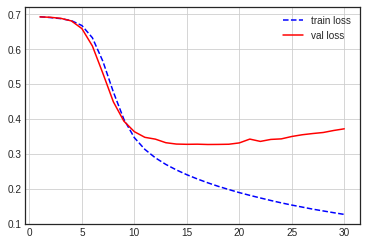

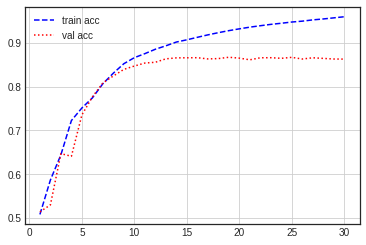

In [89]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'train loss')
plt.plot(epochs, val_loss, 'r-' , label = 'val loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'train acc')
plt.plot(epochs, val_acc, 'r:' , label = 'val acc')
plt.grid()
plt.legend()

plt.show()

- 과적합이 일어났지만, 다른 옵티마이저 사용, 규제화를 걸어보는 등 다양하게 시도해볼 수 있음